#  HW3


## Diego Finkelstein

In [41]:
pip install openpyxl

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from pathlib import Path
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix, parallel_coordinates


## Reading in Dataset

In [3]:
# Reduce data frame to the top 1000 rows and select columns for regression analysis
housing_df = pd.read_excel('House pricing.xlsx', sheet_name = '2017')
housing_df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810494,2017-01-01,3,2.75,2340,8828,1.0,0,0,4,...,1954,0,122047,52.8620,-114.479,3480,8526,3,51,1570000
1,6762810580,2017-01-01,4,4.00,4930,22093,2.0,0,3,3,...,2004,0,122020,52.8174,-114.155,4630,18889,1,70,1470000
2,6762810835,2017-01-01,4,3.50,3100,2261,2.0,0,2,3,...,1981,0,122010,52.8812,-114.392,2660,2000,2,56,1290000
3,6762812692,2017-01-01,4,2.75,2970,59677,1.0,0,2,4,...,1973,0,122020,52.8253,-114.270,2930,42489,2,71,829000
4,6762812744,2017-01-01,3,1.75,1930,8442,1.0,0,0,4,...,1953,0,122048,52.8613,-114.394,1790,8442,2,59,825000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,6762811308,2017-03-15,3,4.00,3370,8252,2.0,0,0,3,...,2014,0,122020,52.8265,-114.203,3710,8252,2,78,1070000
2970,6762811329,2017-03-15,4,2.50,2250,10160,2.0,0,0,5,...,1967,0,122057,52.7945,-114.409,2660,10125,2,51,1060000
2971,6762811971,2017-03-15,5,3.25,3740,11536,2.0,0,0,4,...,1984,0,122027,52.7899,-114.298,2920,11258,1,77,915557
2972,6762812546,2017-03-15,3,1.75,1600,2538,2.0,0,0,3,...,1929,0,122013,52.8747,-114.517,1660,1750,3,74,845000


In [121]:
 #train, test = train_test_split(housing_df, test_size=0.4, random_state=0)

## Data Cleaning & Exploration

Scatter Plot of Housing Price compared to Living Area

Text(0.5, 0, 'living area')

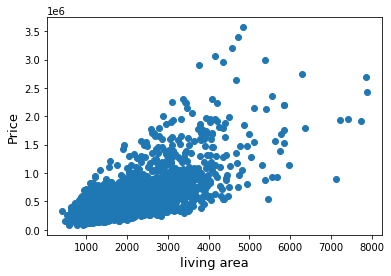

In [122]:
fig, ax = plt.subplots()
ax.scatter(x = housing_df['living area'], y = housing_df['Price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('living area', fontsize=13)

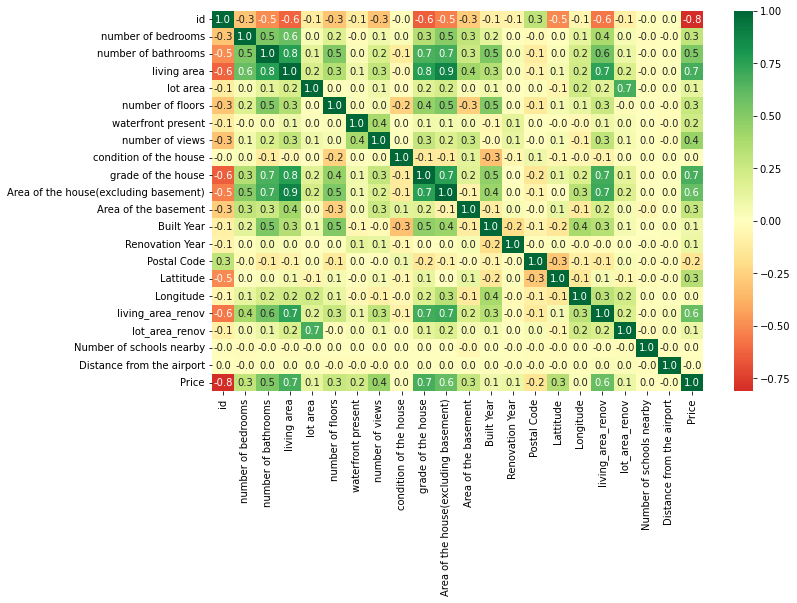

In [123]:
corr = housing_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdYlGn", center=0, ax=ax)

plt.show()

In [124]:
housing_df['Total area']= housing_df["Area of the house(excluding basement)"] + housing_df["Area of the basement"]
housing_df['Age of Property'] = 2017 - housing_df['Built Year'] + 1

In [125]:
housing_df2 = housing_df.drop(columns=['number of bedrooms','lot area','number of floors', 'condition of the house','lot area','waterfront present','condition of the house','Area of the house(excluding basement)','Area of the basement','Built Year','Renovation Year','Postal Code','Lattitude', 'Longitude','lot_area_renov','Number of schools nearby', 'Distance from the airport'])

In [126]:
housing_df2

,id,Date,number of bathrooms,living area,number of views,grade of the house,living_area_renov,Price,Total area,Age of Property
0,6762810494,2017-01-01,2.75,2340,0,9,3480,1570000,2340,64
1,6762810580,2017-01-01,4.00,4930,3,12,4630,1470000,4930,14
2,6762810835,2017-01-01,3.50,3100,2,9,2660,1290000,3100,37
3,6762812692,2017-01-01,2.75,2970,2,8,2930,829000,2970,45
4,6762812744,2017-01-01,1.75,1930,0,7,1790,825000,1930,65
...,...,...,...,...,...,...,...,...,...,...
2969,6762811308,2017-03-15,4.00,3370,0,10,3710,1070000,3370,4
2970,6762811329,2017-03-15,2.50,2250,0,8,2660,1060000,2250,51
2971,6762811971,2017-03-15,3.25,3740,0,9,2920,915557,3740,34
2972,6762812546,2017-03-15,1.75,1600,0,7,1660,845000,1600,89


## Missing Value Check

In [127]:
vars_with_missing = []

for f in housing_df2.columns:
    missings = housing_df2[f].isnull().sum() + len(housing_df2[housing_df2[f]=='MISSING'])
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/df.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

In total, there are 0 variables with missing values


/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

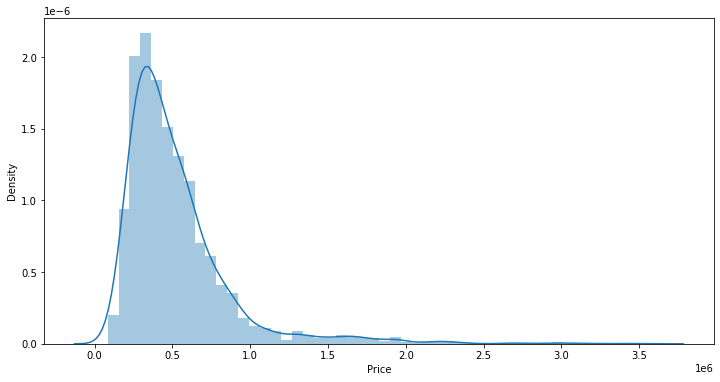

In [128]:
price = housing_df2['Price']
plt.figure(figsize=(12,6))
sns.distplot(price)

In [129]:
housing_df2

,id,Date,number of bathrooms,living area,number of views,grade of the house,living_area_renov,Price,Total area,Age of Property
0,6762810494,2017-01-01,2.75,2340,0,9,3480,1570000,2340,64
1,6762810580,2017-01-01,4.00,4930,3,12,4630,1470000,4930,14
2,6762810835,2017-01-01,3.50,3100,2,9,2660,1290000,3100,37
3,6762812692,2017-01-01,2.75,2970,2,8,2930,829000,2970,45
4,6762812744,2017-01-01,1.75,1930,0,7,1790,825000,1930,65
...,...,...,...,...,...,...,...,...,...,...
2969,6762811308,2017-03-15,4.00,3370,0,10,3710,1070000,3370,4
2970,6762811329,2017-03-15,2.50,2250,0,8,2660,1060000,2250,51
2971,6762811971,2017-03-15,3.25,3740,0,9,2920,915557,3740,34
2972,6762812546,2017-03-15,1.75,1600,0,7,1660,845000,1600,89


In [130]:

excludeColumns = ('Price', 'id', 'Date','Age of Property', 'number of bathrooms')
predictors = [s for s in housing_df2.columns if s not in excludeColumns]
outcome = 'Price'

 Split Training & Test Set

In [131]:
X = pd.get_dummies(housing_df2[predictors], drop_first=True)
y = housing_df2[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

Linear Regression Model

In [132]:
housing_lm = LinearRegression()
housing_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', housing_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': housing_lm.coef_}))

# print performance measures
regressionSummary(train_y, housing_lm.predict(train_X))

intercept  -556236.1247626445
            Predictor   coefficient
0         living area     60.643378
1     number of views  97947.659508
2  grade of the house  94613.142268
3   living_area_renov     45.610132
4          Total area     60.643378

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 222539.5664
            Mean Absolute Error (MAE) : 153203.0518
          Mean Percentage Error (MPE) : -11.6111
Mean Absolute Percentage Error (MAPE) : 33.8870


In [133]:
pred_y = housing_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, housing_lm))
print('AIC : ', AIC_score(train_y, pred_y, housing_lm))
print('BIC : ', BIC_score(train_y, pred_y, housing_lm))

adjusted r2 :  0.5739474549228718
AIC :  49009.057849548575
BIC :  49047.46414274055


Linear Regression Predicted vs. Actual

In [134]:
housing_lm_pred = housing_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': housing_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - housing_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, housing_lm_pred)

         Predicted   Actual       Residual
1984  4.228389e+05   323000  -99838.877705
2369  3.269917e+05   575000  248008.283005
2085  3.610666e+05   325000  -36066.613249
1783  5.593317e+05   450000 -109331.678413
1965  4.498635e+05   417500  -32363.460568
2591  4.593592e+05   622000  162640.810086
1328  4.160280e+05   345000  -71027.981626
110   5.189231e+05   608000   89076.861709
2363  6.516847e+05   620000  -31684.729921
681   6.542455e+05   950000  295754.514413
2396  3.118156e+05   400000   88184.439352
1967  6.183265e+05   408000 -210326.503190
1489  4.359936e+05   400000  -35993.625582
45    1.485534e+06  2150000  664466.032681
1993  4.883228e+05   279000 -209322.782768
2060  3.178697e+05   491000  173130.309505
2211  1.598977e+05   275000  115102.286631
761   4.452405e+05   429000  -16240.464704
654   4.187135e+05   465000   46286.450084
1073  1.536568e+05   153000    -656.788285

Regression statistics

                      Mean Error (ME) : 5661.6892
       Root Mean Square

Backwards Elimination   

In [135]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: living area, number of views, grade of the house, living_area_renov, Total area
Start: score=49009.06
Step: score=49007.06, remove living area
Step: score=49007.06, remove None
['number of views', 'grade of the house', 'living_area_renov', 'Total area']


In [136]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 5661.6892
       Root Mean Squared Error (RMSE) : 242812.2552
            Mean Absolute Error (MAE) : 164086.4661
          Mean Percentage Error (MPE) : -10.1309
Mean Absolute Percentage Error (MAPE) : 33.0736


Forward Selection

In [137]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: living area, number of views, grade of the house, living_area_renov, Total area
Start: score=50526.16, constant
Step: score=49396.47, add living area
Step: score=49200.15, add grade of the house
Step: score=49018.77, add number of views
Step: score=49007.06, add living_area_renov
Step: score=49007.06, add None
['living area', 'grade of the house', 'number of views', 'living_area_renov']


In [138]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: living area, number of views, grade of the house, living_area_renov, Total area
Start: score=50526.16, constant
Step: score=49396.47, add living area
Step: score=49200.15, add grade of the house
Step: score=49018.77, add number of views
Step: score=49007.06, add living_area_renov
Step: score=49007.06, unchanged None
['living area', 'grade of the house', 'number of views', 'living_area_renov']


Lasso Regression

In [139]:
lasso = Lasso(normalize=True, alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

lasso_cv = LassoCV(normalize=True, cv=5)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print(lasso_cv.coef_)


Regression statistics

                      Mean Error (ME) : 5658.1576
       Root Mean Squared Error (RMSE) : 242814.0058
            Mean Absolute Error (MAE) : 164091.8929
          Mean Percentage Error (MPE) : -10.1295
Mean Absolute Percentage Error (MAPE) : 33.0750

Regression statistics

                      Mean Error (ME) : 5686.0194
       Root Mean Squared Error (RMSE) : 242816.1348
            Mean Absolute Error (MAE) : 164039.9598
          Mean Percentage Error (MPE) : -10.1493
Mean Absolute Percentage Error (MAPE) : 33.0625
Lasso-CV chosen regularization:  5.539996629169654
[1.21226909e+02 9.77277682e+04 9.45305388e+04 4.54874228e+01
 1.89211002e-13]


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.161e+10, toleran

In [140]:
linearRegression = LinearRegression(normalize=True).fit(train_X, train_y)
regressionSummary(valid_y, linearRegression.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 6092.2257
       Root Mean Squared Error (RMSE) : 242674.2380
            Mean Absolute Error (MAE) : 163499.5188
          Mean Percentage Error (MPE) : -10.2891
Mean Absolute Percentage Error (MAPE) : 32.9235


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [141]:
pd.DataFrame({'features': train_X.columns, 'linear regression': linearRegression.coef_, 
              'lassoCV': lasso_cv.coef_})

,features,linear regression,lassoCV
0,living area,-4.545936e+15,1.212269e+02
1,number of views,9.866763e+04,9.772777e+04
2,grade of the house,9.330369e+04,9.453054e+04
3,living_area_renov,4.447000e+01,4.548742e+01
4,Total area,4.545936e+15,1.892110e-13
